In [1]:
import sympy as sy
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,Image,HTML

Aaron and Beren are playing a game on an infinite complete binary tree. At the beginning
of the game, every edge of the tree is independently labeled A with probability p and B otherwise. Both players are able to inspect all of these labels 1 . Then,
starting with Aaron at the root of the tree, the players alternate turns moving a shared
token down the tree (each turn the active player selects from the two descendants of the
current node and moves the token along the edge to that node). If the token ever traverses
an edge labeled B , Beren wins the game. Otherwise 2 , Aaron wins. An example game is in the picture above: after the labeling, Aaron chooses to go left to
avoid immediate defeat, but after Beren goes right Aaron is doomed to choose one of two B paths and Beren wins. What is the infimum of the set of
all probabilities p for which Aaron has a nonzero probability of winning the game? Give
your answer in exact terms . … somehow. ↩ To make this precise, we can add the following step to the start of the game: after the edges are labeled and inspected, Beren is allowed to name any positive integer N . Aaron wins if the first N edges traversed by the token are all labeled A , Beren wins if any of them are labeled B

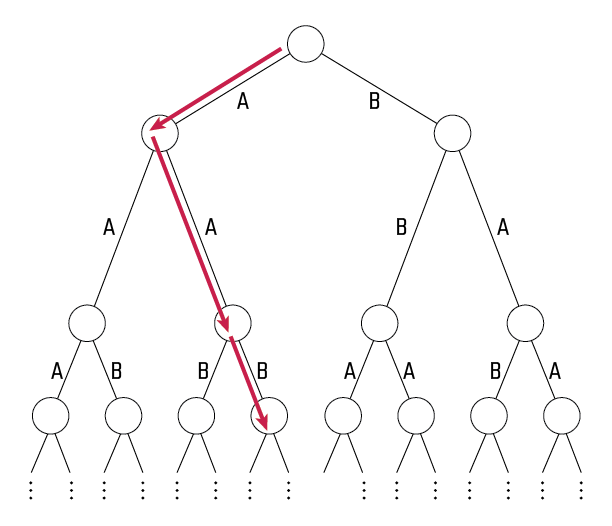

In [2]:
url='https://www.janestreet.com/puzzles/tree-edge-triage-index'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
 #display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[16:49])))
display(Image('https://www.janestreet.com/puzzles/august-2024.png',width=400))

In [3]:
# The probability of winning at the start is q for probability p
p = sy.Symbol("p")
q = sy.Symbol("q")

In [4]:
#We get back to the same point after 2 steps
Eq1 = sy.Eq(2*p**3*q**2  # probability of at least A -> AA
            -(p**3*q**2)**2 # less prob of both A ->AA
            ,q)
Eq1

Eq(-p**6*q**4 + 2*p**3*q**2, q)

In [5]:
#Differentiate by q to get the minimum
Eq2= sy.Eq(sy.diff(Eq1.lhs,"q"),sy.diff(Eq1.rhs,"q"))
Eq2

Eq(-4*p**6*q**3 + 4*p**3*q, 1)

In [6]:
soln = sy.solve([Eq1,Eq2])

In [7]:
soln[0][p]

3*2**(1/3)/4

In [8]:
#check matches published solution
soln[0][p].evalf() == (27/32)**(1/3)

True

In [9]:
url='https://www.janestreet.com/puzzles/tree-edge-triage-solution'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(x)])
display(Markdown(" ".join(x[16:66])))


Suppose for a given p , Aaron’s probability of winning on the infinite tree is x . Then
looking at first two turns in the game, Aaron can win if at least one of the two sides of
the tree has 3 edges marked A and BOTH subtrees Beren can choose between are winnable by
Aaron (which we know has probability x , independently per subtree). So the equation x and p must satisfy is: x = 2 * p ^3 * x ^2 - p ^6 * x ^4. (The subtracted term is from the double counting of when Aaron can win on both sides of
the tree). We want to find the smallest positive p where this has a positive root x < 1. This can
be done with the theory of discriminants, but also can be solved by noticing that as p increases, the graph of the quartic that is the right hand side of the above equation
approaches the graph of f(x) = x from below, and the moment where it touches it will
be tangent. So we can add the constraint that the derivative of the right hand side equals
1 at the point of equality: 1 = 2 * p ^3 * (2 x ) - p ^6 * 4 x ^3 These two equations are solved by x = 8/9, and p = (27/32)^(1/3)